# Modelling  the data

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv ("502project.csv")

In [3]:
data.head(5)

,Unnamed: 0,date,weekend,driving,transit,walking,cases,deaths,total_boosters,total tweet count
0,0,2021-11-15,0,155.021242,99.521319,161.048497,47185415,763425,34254930,34035.0
1,1,2021-11-16,0,157.086692,99.774618,168.144937,47275900,764871,35254044,34372.0
2,2,2021-11-17,0,158.833792,100.054688,171.351771,47390257,766489,36304204,34927.0
3,3,2021-11-18,0,169.836009,102.968646,180.047925,47500530,769719,37381979,32380.0
4,4,2021-11-19,0,208.326922,113.331285,219.929141,47620178,771721,38641212,39943.0


In [4]:
#renaming columns
data.rename(columns={'total_boosters': 'boosters', 'total tweet count':'tweets'}, inplace=True)

# Log transformation of the dataframe 

In [5]:
for column in data.iloc[: , 3:]:
    log_data = np.log(data.iloc[: , 3:])

In [6]:
log_data = log_data.add_suffix('_log')
log_data.head(2)

,driving_log,transit_log,walking_log,cases_log,deaths_log,boosters_log,tweets_log
0,5.043562,4.600372,5.081706,17.669595,13.545570,17.349341,10.435145
1,5.056798,4.602914,5.124826,17.671511,13.547462,17.378091,10.444998


In [7]:
data = pd.concat([data, log_data], axis=1, join='inner')

In [8]:
data.head(5) #with logged values of each variable 

,Unnamed: 0,date,weekend,driving,transit,walking,cases,deaths,boosters,tweets,driving_log,transit_log,walking_log,cases_log,deaths_log,boosters_log,tweets_log
0,0,2021-11-15,0,155.021242,99.521319,161.048497,47185415,763425,34254930,34035.0,5.043562,4.600372,5.081706,17.669595,13.545570,17.349341,10.435145
1,1,2021-11-16,0,157.086692,99.774618,168.144937,47275900,764871,35254044,34372.0,5.056798,4.602914,5.124826,17.671511,13.547462,17.378091,10.444998
2,2,2021-11-17,0,158.833792,100.054688,171.351771,47390257,766489,36304204,34927.0,5.067858,4.605717,5.143719,17.673927,13.549576,17.407444,10.461015
3,3,2021-11-18,0,169.836009,102.968646,180.047925,47500530,769719,37381979,32380.0,5.134833,4.634425,5.193223,17.676251,13.553781,17.436699,10.385296
4,4,2021-11-19,0,208.326922,113.331285,219.929141,47620178,771721,38641212,39943.0,5.339109,4.730315,5.393305,17.678767,13.556378,17.469830,10.595209


# Line Graphs for Variables 

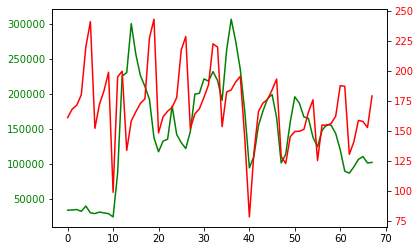

In [9]:
# Line Graph for Mobility and Tweet counts(dependent variable and independent variable)
fig, ax = plt.subplots()
ax.plot(data["tweets"], color='green')
ax.tick_params(axis='y', labelcolor='green')
ax2 = ax.twinx()
ax2.plot(data[["walking"]], color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

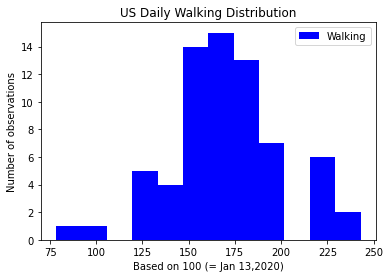

In [10]:
plt.hist(data["walking"],bins=12,
         color='blue',label="Walking");
plt.xlabel("Based on 100 (= Jan 13,2020)")
plt.ylabel("Number of observations")
plt.legend()
plt.title("US Daily Walking Distribution");

In [11]:
print('Kurtosis {}'.format(kurtosis(data["walking"])) ) #negatively kurtotic 
print('Skew: {}'.format(skew(data["walking"])) ) #if the skewness is between -0.5 and 0.5, the data are fairly symmetrical

Kurtosis 0.7614168945893369
Skew: 0.023802096496604596


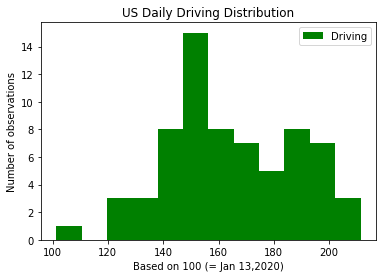

In [12]:
plt.hist(data["driving"],bins=12,
         color='green',label="Driving");
plt.xlabel("Based on 100 (= Jan 13,2020)")
plt.ylabel("Number of observations")
plt.legend()
plt.title("US Daily Driving Distribution");

In [13]:
print('Kurtosis {}'.format(kurtosis(data["driving"])) ) #negatively kurtotic 
print('Skew: {}'.format(skew(data["driving"])) ) #if the skewness is between -0.5 and 0.5, the data are fairly symmetrical

Kurtosis -0.2918444514537586
Skew: -0.009743380970013418


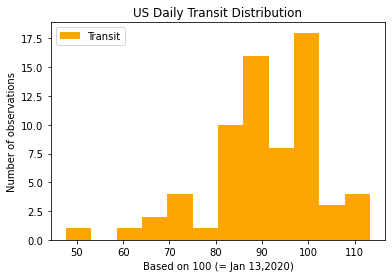

In [14]:
plt.hist(data["transit"],bins=12,
         color='orange',label="Transit");
plt.xlabel("Based on 100 (= Jan 13,2020)")
plt.ylabel("Number of observations")
plt.legend()
plt.title("US Daily Transit Distribution");

In [15]:
print('Kurtosis {}'.format(kurtosis(data["transit"])) ) 
print('Skew: {}'.format(skew(data["transit"])) ) 

Kurtosis 1.634959026265883
Skew: -0.9951396725433707


# Box Cox 

### Walking 

Lambda value used for Transformation: 1.0404558220416402


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


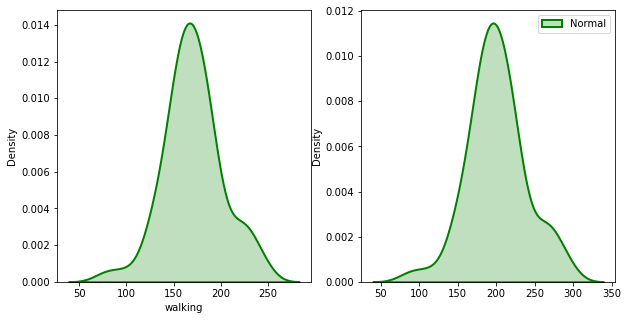

In [16]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data["walking"])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(data["walking"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [17]:
data["walking_box_cox"] = fitted_data

In [18]:
data.columns

Index(['Unnamed: 0', 'date', 'weekend', 'driving', 'transit', 'walking',
       'cases', 'deaths', 'boosters', 'tweets', 'driving_log', 'transit_log',
       'walking_log', 'cases_log', 'deaths_log', 'boosters_log', 'tweets_log',
       'walking_box_cox'],
      dtype='object')

Lagging the mobility columns five days later because people don't see a tweet and suddenly make up their minds. 

In [19]:
data[['date','weekend', 'driving', 'transit','driving_log','transit_log','walking_log',"walking_box_cox"]] = data[['date','weekend', 'driving', 'transit','driving_log','transit_log','walking_log',"walking_box_cox"]].shift(5)

In [20]:
data.head(10)

,Unnamed: 0,date,weekend,driving,transit,walking,cases,deaths,boosters,tweets,driving_log,transit_log,walking_log,cases_log,deaths_log,boosters_log,tweets_log,walking_box_cox
0,0,NaN,NaN,NaN,NaN,161.048497,47185415,763425,34254930,34035.0,NaN,NaN,NaN,17.669595,13.545570,17.349341,10.435145,NaN
1,1,NaN,NaN,NaN,NaN,168.144937,47275900,764871,35254044,34372.0,NaN,NaN,NaN,17.671511,13.547462,17.378091,10.444998,NaN
2,2,NaN,NaN,NaN,NaN,171.351771,47390257,766489,36304204,34927.0,NaN,NaN,NaN,17.673927,13.549576,17.407444,10.461015,NaN
3,3,NaN,NaN,NaN,NaN,180.047925,47500530,769719,37381979,32380.0,NaN,NaN,NaN,17.676251,13.553781,17.436699,10.385296,NaN
4,4,NaN,NaN,NaN,NaN,219.929141,47620178,771721,38641212,39943.0,NaN,NaN,NaN,17.678767,13.556378,17.469830,10.595209,NaN
5,5,2021-11-15,0.0,155.021242,99.521319,240.946995,47661242,772046,39295976,30262.0,5.043562,4.600372,5.081706,17.679629,13.556799,17.486633,10.317648,189.154275
6,6,2021-11-16,0.0,157.086692,99.774618,152.100644,47692614,772169,39662837,29197.0,5.056798,4.602914,5.124826,17.680287,13.556959,17.495925,10.281821,197.878088
7,7,2021-11-17,0.0,158.833792,100.054688,172.261270,47851512,773402,40782210,31329.0,5.067858,4.605717,5.143719,17.683613,13.558554,17.523757,10.352299,201.825249
8,8,2021-11-18,0.0,169.836009,102.968646,183.394758,47944283,774880,41879231,30191.0,5.134833,4.634425,5.193223,17.685550,13.560463,17.550301,10.315299,212.543886
9,9,2021-11-19,0.0,208.326922,113.331285,198.798819,48064175,776516,42680064,29082.0,5.339109,4.730315,5.393305,17.688048,13.562573,17.569242,10.277875,261.955544


In [21]:
data = data.dropna()

In [22]:
data.head(10)


,Unnamed: 0,date,weekend,driving,transit,walking,cases,deaths,boosters,tweets,driving_log,transit_log,walking_log,cases_log,deaths_log,boosters_log,tweets_log,walking_box_cox
5,5,2021-11-15,0.0,155.021242,99.521319,240.946995,47661242,772046,39295976,30262.0,5.043562,4.600372,5.081706,17.679629,13.556799,17.486633,10.317648,189.154275
6,6,2021-11-16,0.0,157.086692,99.774618,152.100644,47692614,772169,39662837,29197.0,5.056798,4.602914,5.124826,17.680287,13.556959,17.495925,10.281821,197.878088
7,7,2021-11-17,0.0,158.833792,100.054688,172.261270,47851512,773402,40782210,31329.0,5.067858,4.605717,5.143719,17.683613,13.558554,17.523757,10.352299,201.825249
8,8,2021-11-18,0.0,169.836009,102.968646,183.394758,47944283,774880,41879231,30191.0,5.134833,4.634425,5.193223,17.685550,13.560463,17.550301,10.315299,212.543886
9,9,2021-11-19,0.0,208.326922,113.331285,198.798819,48064175,776516,42680064,29082.0,5.339109,4.730315,5.393305,17.688048,13.562573,17.569242,10.277875,261.955544
10,10,2021-11-20,1.0,200.237978,104.583368,98.787460,48095028,776893,42692451,24437.0,5.299507,4.649985,5.484577,17.688689,13.563058,17.569533,10.103854,288.147117
11,11,2021-11-21,1.0,153.727911,84.459722,195.030447,48146553,777437,43388524,87143.0,5.035184,4.436275,5.024542,17.689760,13.563758,17.585706,11.375306,178.176715
12,12,2021-11-22,0.0,169.592346,102.241354,199.656261,48171232,777629,43847084,225228.0,5.133398,4.627336,5.149012,17.690273,13.564005,17.596219,12.324869,202.945261
13,13,2021-11-23,0.0,188.860554,105.339931,133.692683,48195182,777750,44136777,230145.0,5.241009,4.657193,5.211641,17.690770,13.564160,17.602804,12.346465,216.674741
14,14,2021-11-24,0.0,208.926860,102.261181,158.312487,48411494,779624,45055771,299908.0,5.341984,4.627530,5.292293,17.695248,13.566567,17.623412,12.611231,235.725867


In [23]:
data.columns

Index(['Unnamed: 0', 'date', 'weekend', 'driving', 'transit', 'walking',
       'cases', 'deaths', 'boosters', 'tweets', 'driving_log', 'transit_log',
       'walking_log', 'cases_log', 'deaths_log', 'boosters_log', 'tweets_log',
       'walking_box_cox'],
      dtype='object')

In [24]:
data.to_csv('last_prj_csv.csv')

# OLS 

In [25]:
y = data['walking_box_cox']
X = pd.DataFrame(data[['weekend','cases_log', 'deaths_log', 'boosters_log', 'tweets']])
X['constant'] = 1
myFit = sm.OLS(y, X).fit()
model1 = sm.OLS(y, X)
result = model1.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        walking_box_cox   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.389
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.242
Time:                        14:28:28   Log-Likelihood:                -315.78
No. Observations:                  63   AIC:                             643.6
Df Residuals:                      57   BIC:                             656.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
weekend         -8.4754     11.040     -0.768      0.446     -30.582      13.631
cases_log       78.2352    433.279      0.181      0.857    -789.392     945.862
deaths_log   -1403.4397   3197.212     -0.439      0.662   -7805.746    4998.867
boosters_log   115.4248    256.451      0.450      0.654    -398.109     628.959
tweets       -1.742e-05   9.01e-05     -0.193      0.847      -0.000       0.000
constant      1.584e+04   3.15e+04      0.503      0.617   -4.72e+04    7.89e+04
==============================================================================
Omnibus:                        2.149   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.520
Skew:                           0.035   Prob(JB):                        0.468
Kurtosis:                       3.758   Cond. No.                     1.11e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Assumptions 

# Autocorrelation

The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample. Values from 0 to less than 2 point to positive autocorrelation.

# Normality 

Jarque-Bera test ---- statistic: 1.5196, p-value: 0.46777146181567364
Shapiro-Wilk test ---- statistic: 0.9581, p-value: 0.0311
Kolmogorov-Smirnov test ---- statistic: 0.5671, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.9302, 5% critical value: 0.7440
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


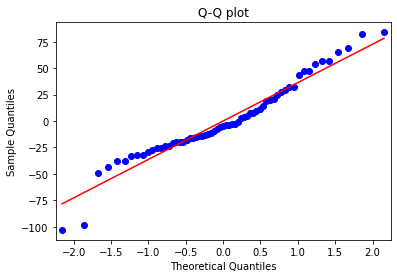

In [26]:
def normality_of_residuals_test(model1): 

    sm.ProbPlot(model1.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model1.resid)
    sw = stats.shapiro(model1.resid)
    ad = stats.anderson(model1.resid, dist='norm')
    ks = stats.kstest(model1.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(myFit) 


### Linearity 

-3.0102905424110572e-09

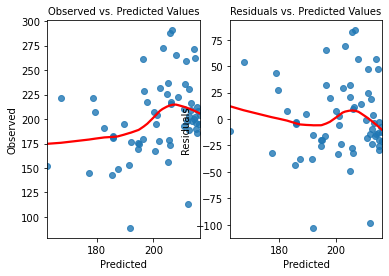

In [27]:
def linearity_test(model1, y):

    fitted_vals = model1.predict()
    resids = model1.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(myFit, y)

myFit.resid.mean()


### No Multicolleniarity 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
np.sqrt(vif[:-1]) #we'll either drop the variables above 10 or perform PCA

array([ 1.03551809, 10.31509241, 21.34613018, 12.2374227 ,  1.24206276])

### Homoscedasticity


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  14.179373
p-value                         0.014509
f-value                         3.310995
f p-value                       0.010778

 Goldfeld-Quandt test ----
                value
F statistic  0.476716
p-value      0.965977

 Residuals plots ----


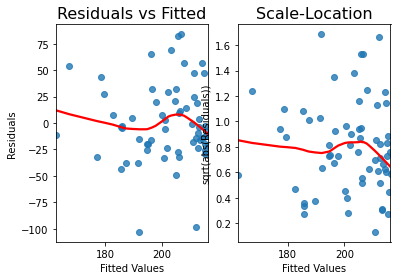

In [30]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):

    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(myFit)

In [31]:
outMat = myFit.outlier_test()
any(outMat['bonf(p)'] < .05)  

False

In [32]:
#variability in X
X.apply(np.var, axis=0)

weekend         2.040816e-01
cases_log       1.314617e-02
deaths_log      1.033914e-03
boosters_log    5.281536e-02
tweets          4.405221e+09
constant        0.000000e+00
dtype: float64

# PCA for multicollinearity

To prevent strong multicollineraity, we'll either use PCA or partial least squares regression.

In [33]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [35]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [36]:
regr = LinearRegression()
mse = []

In [37]:
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [38]:
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

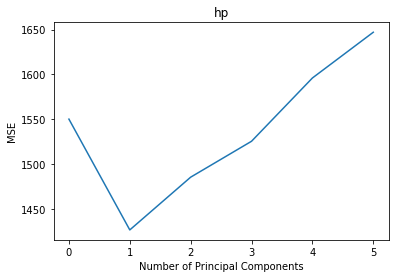

In [39]:
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp');

From the plot we can see that the test MSE decreases by adding in one principal component, yet it begins to increase as we add more than one principal component.Thus, the optimal model includes just the first component.

In [40]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 57.45,  78.43,  97.98,  99.98, 100.01, 100.01])

By using just the first principal component, we can explain 57.45% of the variation in the response variable.

In [41]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

41.44484854168144

We can see that the test RMSE turns out to be 41.6460. This is the average deviation between the predicted value for hp and the observed value for hp for the observations in the testing set.

# Poisson 

In [42]:
model = smf.glm(formula = "walking_log ~ cases_log + deaths_log + tweets_log + boosters + weekend", data=data, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            walking_log   No. Observations:                   63
Model:                            GLM   Df Residuals:                       57
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -110.58
Date:                Sat, 29 Jan 2022   Deviance:                      0.42544
Time:                        14:28:31   Pearson chi2:                    0.421
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6274    574.241      0.020      0.9